This is Kelly Wiseman's Ipython notebook from the Titanic Kaggle knowledge competition. Check out Kaggle's website for more competition details and data files.

# Predict survival on the Titanic

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## Goal
In this Kaggle challenge, we are asked to apply the tools of machine learning to predict which passengers survived the tragedy.

## Data
Given: training set (891 rows) with survival classification and test set (418 rows) without survival classification

VARIABLE DESCRIPTIONS:

<li>survival: Survival (0 = No; 1 = Yes)</li>
<li>pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)</li>
<li>name: Name</li>
<li>sex: Sex (male or female)</li>
<li>age: Age</li>
<li>sibsp: Number of Siblings/Spouses Aboard</li>
<li>parch: Number of Parents/Children Aboard</li>
<li>ticket: Ticket Number</li>
<li>fare: Passenger Fare</li>
<li>cabin: Cabin</li>
<li>embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</li>

SPECIAL NOTES:

Pclass is a proxy for socio-economic status: 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1). If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.

<li>Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic</li>
<li>Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)</li>
<li>Parent:   Mother or Father of Passenger Aboard Titanic</li>
<li>Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic</li>

Other family relatives excluded from this study include cousins,nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

## Results
<li>I tested several machine learning tools, both to learn how to use them in general, and to see how well they perform on the Titanic dataset. The feature selection tool showed that the parent-child and normalized-age features were less important for predicting survival than class, sibling-spouse, gender, normalized-fare, and the features I created: penalty, age group, and family size. I ran most of the classification models with both the full dataset (with only the non-numerical features removed), and the reduced-feature dataset (with parent-child and normalized-age removed).</li>
<li>The logistic regression classifier is not prone to over-fitting. This dataset is somewhat sensitive to the regularization parameter. The fit to the full training dataset with the default parameters is 82%, with cross-validation score of 80% and Kaggle score of 76%. The Kaggle score ranges from 74% to 78% with the regularization parameter ranging from 0.1 to 10, and highest score at r = 0.4. The fit to the reduced-feature training set with default parameters is 81% with a cross-validation score of 80% and Kaggle score of 73%. The reduced-feature data is best fit with a lower regularization parameter between 0.05 - 0.1, producing a Kaggle score of 77%.</li>
<li>The decision tree classifier is prone to over-fitting. With the default settings, the training data is fit at 98%, but the mean cross-validation score is 77% and the test data is fit by Kaggle at 62%. The over-fitting is reduced when you use the reduced-feature data, with training data fit of 94%, cross-validation score of 81%, and Kaggle score of 70%. It also helps considerably when you limit the maximum depth of the tree, and include a minimum number of samples per leaf node. I used a minimum number of samples per leaf of 5 and tuned the maximum depth of the tree. The optimal depth is 3, with a fit to the training data of 83%, cross-validation score of 81%, and Kaggle score of 78%. </li>
<li>For the ensemble classifier random forest, I started with the same tree maximum depth and minimum number of samples per leaf node as for the decision tree classifier and I used a maximum of 1000 estimators. The fit to the full training dataset is 83%, with cross-validation score of 82% and Kaggle score of 76%. The fit to the reduced-feature training set is also 84% with a cross-validation score of 82% and Kaggle score of 76%. I tested other maxium tree depth values, and the Kaggle score improved slightly to 77% with a maximum depth of 5. The fit did not improve by increasing the number of estimators.</li>
<li>For the ensemble classifier AdaBoost, I used the default base estimator and tuned the learning rate and the number of estimators. I tested learning rates between 0.1 and 1.0 and number of estimators between 1000 and 3000.  For the full training set, the best Kaggle score of 78% was found with learning rate of 0.1 and number of estimators of 3000, which had a fit to the training data of 85% and cross-validation score of 82%.  Since the best score was found at the edge of my parameter space, it might improve with further tuning. I did not test the reduced-feature dataset with this classifier method.</li>
<li>For the Gradient Boosting ensemble classifier, I tried performing a parameter grid search instead of manually tuning the input parameters. The parameter ranges tested were: number of estimators 50 - 5000, learning rate 0.005 - 1.0, maximum features 2 - 6, maximum tree depth 2 - 6. The optimal cross-validation score was acheived with number of estimators = 300, learning rate = 0.01, maximum features = 4 and maximum depth = 4. This produced a Kaggle score of 77%. I acheived the same Kaggle score with maximum features and maximum depth = 3, and with learning rate = 0.02. This shows that the Titanic dataset is not large enough for the best cross-validation score to directly correlate with the best prediction. I did not test the reduced-feature dataset with this classifier method.</li>
<li>Overall the logistic regression and decision tree classifier performed best, correctly predicting passenger survival for 78% of the Titanic test data. Logistic regression was fast and easy to optimize the regularization parameter. The decision tree classifier was prone to over-fitting and I needed to tune several parameters to get optimal results.  The ensemble classifiers produced similar results, but did not improve upon the simpler classification methods for this small Titanic dataset.  For the best models, the cross-validation score is still 3-5% higher than the Kaggle score, and I'm assuming it's because the dataset is too small. Also, for this dataset, you can't rely on the best prediction result coming from the highest cross-validation score. In general, using the reduced-feature dataset helped to reduce model over-fitting, but did not produce the best Kaggle predictions.</li>


## Exploratory Analysis

In [2]:
# import packages
import pandas as pd
import numpy as np
import brewer2mpl
import matplotlib.pyplot as plt
%matplotlib inline

# read in data
training_df = pd.read_csv('data/titanic/train.csv', header=0)
test_df = pd.read_csv('data/titanic/test.csv', header=0)


In [3]:
# Set up some better defaults for matplotlib
from matplotlib import rcParams

#colorbrewer2 Dark2 qualitative color table
dark2_colors = brewer2mpl.get_map('Dark2', 'Qualitative', 7).mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


In [4]:
# view training data
training_df.head(10)

survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   
5         0       3                                   Moran, Mr. James   
6         0       1                            McCarthy, Mr. Timothy J   
7         0       3                     Palsson, Master. Gosta Leonard   
8         1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9         1       2                Nasser, Mrs. Nicholas (Adele Achem)   

      sex  age  sibsp  parch            ticket     fare cabin embarked  
0    male   22      1      0         A/5 21171   7.2500   NaN        S  
1  female   38      1      0          PC 17599  71.2833   C85        C  
2  female   26      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female   35      1      0            113803  53.1000  C123        S  
4    male   35      0      0            373450   8.0500   NaN        S  
5    male  NaN      0      0            330877   8.4583   NaN        Q  
6    male   54      0      0             17463  51.8625   E46        S  
7    male    2      3      1            349909  21.0750   NaN        S  
8  female   27      0      2            347742  11.1333   NaN        S  
9  female   14      1      0            237736  30.0708   NaN        C  

[10 rows x 11 columns]

In [5]:
# check for data type and null values
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)

In [6]:
# view basic statistics 
training_df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

[8 rows x 6 columns]

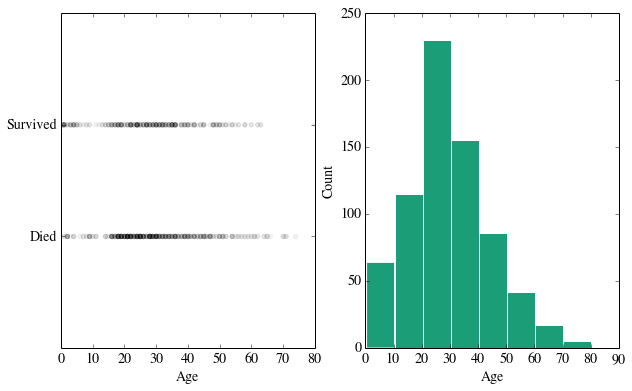

In [7]:
### plot the age distribution ###

plt.subplot(121)
plt.scatter(training_df.age, training_df.survived, color='k', alpha=0.05)
plt.ylim(-1, 2)
plt.yticks([0.0, 1.0], ['Died', 'Survived'], rotation='horizontal')
plt.xlim(0, training_df.age.max())
plt.xlabel("Age")

plt.subplot(122)
plt.hist(training_df.age.dropna(),bins=8) 
plt.xlabel("Age")
plt.ylabel("Count")


survived    0    1
pclass            
1          80  136
2          97   87
3         372  119

[3 rows x 2 columns]


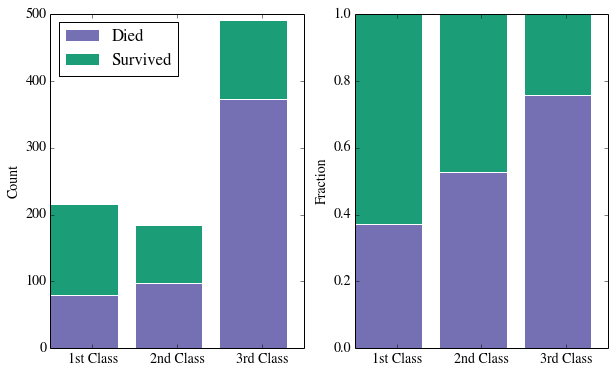

In [8]:
### plot the class distribution ###
tclass = training_df.groupby(['pclass', 'survived']).size().unstack()
print tclass

plt.subplot(121)
plt.bar([0, 1, 2], tclass[0], color=dark2_colors[2], label='Died')
plt.bar([0, 1, 2], tclass[1], bottom=tclass[0], color=dark2_colors[0], label='Survived')
plt.xticks([0.5, 1.5, 2.5], ['1st Class', '2nd Class', '3rd Class'], rotation='horizontal')
plt.ylabel("Count")
plt.xlabel("")
plt.legend(loc='upper left')

#normalize each row by transposing, normalizing each column, and un-transposing
tclass = (1. * tclass.T / tclass.T.sum()).T

plt.subplot(122)
plt.bar([0, 1, 2], tclass[0], color=dark2_colors[2], label='Died')
plt.bar([0, 1, 2], tclass[1], bottom=tclass[0], color=dark2_colors[0], label='Survived')
plt.xticks([0.5, 1.5, 2.5], ['1st Class', '2nd Class', '3rd Class'], rotation='horizontal')
plt.ylabel("Fraction")
plt.xlabel("")

survived    0    1
gender            
0          81  233
1         468  109

[2 rows x 2 columns]


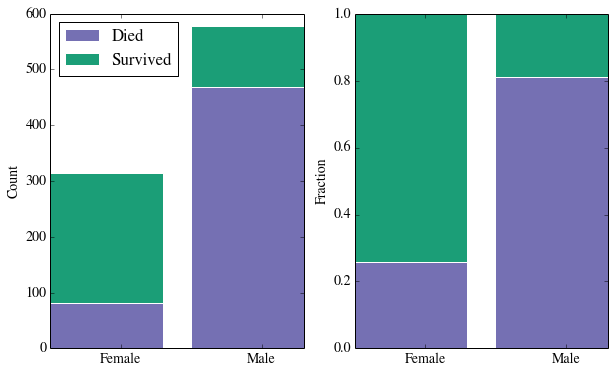

In [9]:
### plot the gender distribution ###

#first convert gender string to numeric value
training_df['gender'] = 0 # create new column by giving a value
training_df.gender = training_df.sex.map({'female':0,'male':1}).astype(int) # map sex to numeric value
test_df['gender'] = 0 # create new column by giving a value
test_df.gender = test_df.sex.map({'female':0,'male':1}).astype(int) # map sex to numeric value

gender = training_df.groupby(['gender', 'survived']).size().unstack()
print gender

plt.subplot(121)
plt.bar([0, 1], gender[0], color=dark2_colors[2], label='Died')
plt.bar([0, 1], gender[1], bottom=gender[0], color=dark2_colors[0], label='Survived')
plt.xticks([0.5, 1.5], ['Female', 'Male'], rotation='horizontal')
plt.ylabel("Count")
plt.xlabel("")
plt.legend(loc='upper left')

#normalize each row by transposing, normalizing each column, and un-transposing
gender = (1. * gender.T / gender.T.sum()).T

plt.subplot(122)
plt.bar([0, 1], gender[0], color=dark2_colors[2], label='Died')
plt.bar([0, 1], gender[1], bottom=gender[0], color=dark2_colors[0], label='Survived')
plt.xticks([0.5, 1.5], ['Female', 'Male'], rotation='horizontal')
plt.ylabel("Fraction")
plt.xlabel("")

## Transform Data

### Fill in estimates for null data and normalize the age and fare features

In [10]:
### fill in estimates for the missing ages by gender and class ###

# Inspection of the name feature reveals that males <= 12 are usually called 'Master' 
# and females are titled 'Miss' if they are not married. Female children generally have parent on board, 
# but female single women don't. Misses with null age and parch >0 generally do not survive 
# while those with parch == 0 do survive.
# Mr. with null ages generally do not survive
# Master. with null age have variable survival

# Make a new 'penalty' feature to include these observations about the null ages

median_ages = np.zeros((2,3))
for i in range(0,2):
        for j in range(0,3):
            median_ages[i,j] = training_df[(training_df.gender == i) & (training_df.pclass == j+1)].age.dropna().median()
            
training_df['AgeFill']=training_df.age
training_df['penalty']=0

# fill in null female ages
for j in range(0,3):
    training_df.loc[(training_df.age.isnull())&(training_df.gender == 0)&(training_df.pclass == j+1)&(training_df['name'].str.contains('Mrs. ')),'AgeFill']=median_ages[0,j]
    training_df.loc[(training_df.age.isnull())&(training_df.gender == 0)&(training_df.pclass == j+1)&(training_df['name'].str.contains('Ms. ')),'AgeFill']=median_ages[0,j]
    training_df.loc[(training_df.age.isnull())&(training_df.gender == 0)&(training_df.pclass == j+1)&(training_df['name'].str.contains('Miss. '))&(training_df.parch ==0),'AgeFill']=median_ages[0,j]
    training_df.loc[(training_df.age.isnull())&(training_df.gender == 0)&(training_df.pclass == j+1)&(training_df['name'].str.contains('Miss. '))&(training_df.parch >0),'AgeFill']=8
    training_df.loc[(training_df.age.isnull())&(training_df.gender == 0)&(training_df.pclass == j+1)&(training_df['name'].str.contains('Miss. '))&(training_df.parch >0),'penalty']=1

# fill in null male ages
for j in range(0,3):
    training_df.loc[(training_df.age.isnull())&(training_df.gender == 1)&(training_df.pclass == j+1)&(training_df['name'].str.contains('Mr. ')),'AgeFill']=median_ages[1,j]
    training_df.loc[(training_df.age.isnull())&(training_df.gender == 1)&(training_df.pclass == j+1)&(training_df['name'].str.contains('Mr. ')),'penalty']=1
    training_df.loc[(training_df.age.isnull())&(training_df.gender == 1)&(training_df.pclass == j+1)&(training_df['name'].str.contains('Master. ')),'AgeFill']=8
    training_df.loc[(training_df.age.isnull())&(training_df.gender == 1)&(training_df.pclass == j+1)&(training_df['name'].str.contains('Dr. ')),'AgeFill']=median_ages[1,j]
    
# check that it worked
print training_df[training_df.age.isnull() ][['survived','gender','pclass','age','AgeFill','penalty']].head(10)

# do the same for the test data
# fill in estimates for the missing ages by gender and class
test_median_ages = np.zeros((2,3))
for i in range(0,2):
        for j in range(0,3):
            test_median_ages[i,j] = test_df[(test_df.gender == i) & (test_df.pclass == j+1)].age.dropna().median()
            
test_df['AgeFill']=test_df.age
test_df['penalty']=0

# fill in null female ages
for j in range(0,3):
    test_df.loc[(test_df.age.isnull())&(test_df.gender == 0)&(test_df.pclass == j+1)&(test_df['name'].str.contains('Mrs. ')),'AgeFill']=median_ages[0,j]
    test_df.loc[(test_df.age.isnull())&(test_df.gender == 0)&(test_df.pclass == j+1)&(test_df['name'].str.contains('Ms. ')),'AgeFill']=median_ages[0,j]
    test_df.loc[(test_df.age.isnull())&(test_df.gender == 0)&(test_df.pclass == j+1)&(test_df['name'].str.contains('Miss. '))&(test_df.parch ==0),'AgeFill']=median_ages[0,j]
    test_df.loc[(test_df.age.isnull())&(test_df.gender == 0)&(test_df.pclass == j+1)&(test_df['name'].str.contains('Miss. '))&(test_df.parch >0),'AgeFill']=8
    test_df.loc[(test_df.age.isnull())&(test_df.gender == 0)&(test_df.pclass == j+1)&(test_df['name'].str.contains('Miss. '))&(test_df.parch >0),'penalty']=1

# fill in null male ages
for j in range(0,3):
    test_df.loc[(test_df.age.isnull())&(test_df.gender == 1)&(test_df.pclass == j+1)&(test_df['name'].str.contains('Mr. ')),'AgeFill']=median_ages[1,j]
    test_df.loc[(test_df.age.isnull())&(test_df.gender == 1)&(test_df.pclass == j+1)&(test_df['name'].str.contains('Mr. ')),'penalty']=1
    test_df.loc[(test_df.age.isnull())&(test_df.gender == 1)&(test_df.pclass == j+1)&(test_df['name'].str.contains('Master. ')),'AgeFill']=8
    test_df.loc[(test_df.age.isnull())&(test_df.gender == 1)&(test_df.pclass == j+1)&(test_df['name'].str.contains('Dr. ')),'AgeFill']=median_ages[1,j] 

    survived  gender  pclass  age  AgeFill  penalty
5          0       1       3  NaN     25.0        1
17         1       1       2  NaN     30.0        1
19         1       0       3  NaN     21.5        0
26         0       1       3  NaN     25.0        1
28         1       0       3  NaN     21.5        0
29         0       1       3  NaN     25.0        1
31         1       0       1  NaN     35.0        0
32         1       0       3  NaN     21.5        0
36         1       1       3  NaN     25.0        1
42         0       1       3  NaN     25.0        1

[10 rows x 6 columns]


In [11]:
# fill in estimates for the missing fares, by class, for training data
median_fares = np.zeros(3)
for i in range(0,3):
    median_fares[i] = training_df[(training_df.pclass == i+1)].fare.dropna().median()

training_df['FareFill']=training_df.fare
for i in range(0,3):
    training_df.loc[(training_df.fare.isnull())&(training_df.pclass == i+1),'FareFill']=median_fares[i]
        
# fill in estimates for the missing fares, by class, for test data
test_median_fares = np.zeros(3)
for i in range(0,3):
    test_median_fares[i] = test_df[(test_df.pclass == i+1)].fare.dropna().median()
            
test_df['FareFill']=test_df.fare
for j in range(0,3):
    test_df.loc[(test_df.fare.isnull())&(test_df.pclass == i+1),'FareFill']=test_median_fares[i]

In [12]:
# Normalize the AgeFill and FareFill features

training_df['AgeNorm'] = training_df.AgeFill
training_df.AgeNorm = (training_df.AgeNorm - training_df.AgeFill.mean()) / training_df.AgeFill.std()
test_df['AgeNorm'] = test_df.AgeFill
test_df.AgeNorm = (test_df.AgeNorm - test_df.AgeFill.mean()) / test_df.AgeFill.std()

training_df['FareNorm'] = training_df.FareFill
training_df.FareNorm = (training_df.FareNorm - training_df.FareFill.mean()) / training_df.FareFill.std()
test_df['FareNorm'] = test_df.FareFill
test_df.FareNorm = (test_df.AgeNorm - test_df.FareFill.mean()) / test_df.FareFill.std()

# check results
training_df.head(5)

survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex  age  sibsp  parch            ticket     fare cabin embarked  \
0    male   22      1      0         A/5 21171   7.2500   NaN        S   
1  female   38      1      0          PC 17599  71.2833   C85        C   
2  female   26      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female   35      1      0            113803  53.1000  C123        S   
4    male   35      0      0            373450   8.0500   NaN        S   

   gender  AgeFill  penalty  FareFill   AgeNorm  FareNorm  
0       1       22        0    7.2500 -0.510307 -0.502163  
1       0       38        0   71.2833  0.673058  0.786404  
2       0       26        0    7.9250 -0.214466 -0.488580  
3       0       35        0   53.1000  0.451177  0.420494  
4       1       35        0    8.0500  0.451177 -0.486064  

[5 rows x 17 columns]

### Create new features

In [13]:
# Group ages to simplify machine learning algorithms.  0:0-5, 1:6-10, 2:11-15, 3:16-59, 4:>60
training_df['AgeGroup']=0
training_df.loc[(training_df.AgeFill<6),'AgeGroup']=0
training_df.loc[(training_df.AgeFill>=6) & (training_df.AgeFill <11),'AgeGroup']=1
training_df.loc[(training_df.AgeFill>=11) & (training_df.AgeFill <16),'AgeGroup']=2
training_df.loc[(training_df.AgeFill>=16) & (training_df.AgeFill <60),'AgeGroup']=3
training_df.loc[(training_df.AgeFill>=60),'AgeGroup']=4

test_df['AgeGroup']=0
test_df.loc[(training_df.AgeFill<6),'AgeGroup']=0
test_df.loc[(training_df.AgeFill>=6) & (test_df.AgeFill <11),'AgeGroup']=1
test_df.loc[(training_df.AgeFill>=11) & (test_df.AgeFill <16),'AgeGroup']=2
test_df.loc[(training_df.AgeFill>=16) & (test_df.AgeFill <60),'AgeGroup']=3
test_df.loc[(training_df.AgeFill>=60),'AgeGroup']=4

survived    0    1
AgeGroup          
0          13   31
1          23   10
2           8   11
3         486  283
4          19    7

[5 rows x 2 columns]


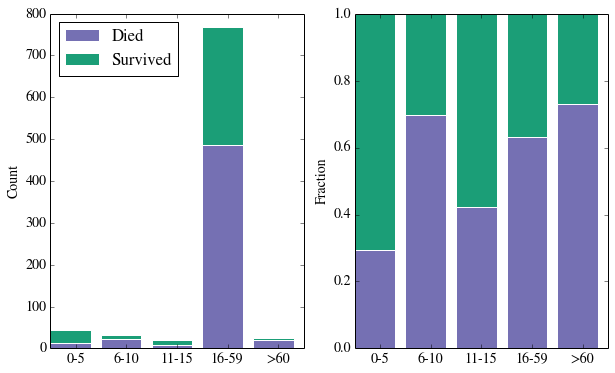

In [14]:
### plot age groups ###
age_group = training_df.groupby(['AgeGroup', 'survived']).size().unstack()
print age_group

plt.subplot(121)
plt.bar([0, 1, 2, 3, 4], age_group[0], color=dark2_colors[2], label='Died')
plt.bar([0, 1, 2, 3, 4], age_group[1], bottom=age_group[0], color=dark2_colors[0], label='Survived')
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ['0-5', '6-10', '11-15','16-59','>60'], rotation='horizontal')
plt.ylabel("Count")
plt.xlabel("")
plt.legend(loc='upper left')

# normalize each row by transposing, normalizing each column, and un-transposing
age_group = (1. * age_group.T / age_group.T.sum()).T

plt.subplot(122)
plt.bar([0, 1, 2, 3, 4], age_group[0], color=dark2_colors[2], label='Died')
plt.bar([0, 1, 2, 3, 4], age_group[1], bottom=age_group[0], color=dark2_colors[0], label='Survived')
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ['0-5', '6-10', '11-15','16-59','>60'], rotation='horizontal')
plt.ylabel("Fraction")
plt.xlabel("")

In [15]:
# combine parent and sibling data into FamilySize
training_df['FamilySize']=training_df.sibsp+training_df.parch
test_df['FamilySize']=test_df.sibsp+test_df.parch

### Reduce the dataframe

In [16]:
# Drop the non-numeric attributes, attributes with null values, and un-normalized attributes from the training data and test data
# so we can use the machine learning algorithms
training_df = training_df.drop(['name','cabin','embarked','age', 'AgeFill', 'sex','ticket','fare', 'FareFill'],axis=1)
test_df = test_df.drop(['name','cabin','embarked','age', 'AgeFill', 'sex','ticket','fare', 'FareFill'],axis=1)

# check results
training_df.head(5)

survived  pclass  sibsp  parch  gender  penalty   AgeNorm  FareNorm  \
0         0       3      1      0       1        0 -0.510307 -0.502163   
1         1       1      1      0       0        0  0.673058  0.786404   
2         1       3      0      0       0        0 -0.214466 -0.488580   
3         1       1      1      0       0        0  0.451177  0.420494   
4         0       3      0      0       1        0  0.451177 -0.486064   

   AgeGroup  FamilySize  
0         3           1  
1         3           1  
2         3           0  
3         3           1  
4         3           0  

[5 rows x 10 columns]

In [17]:
# convert dataframes to arrays for use with machine learning algorithms
training_data = training_df.values
test_data = test_df.values

## Make predictions using machine learning tools

### Feature Selection

In [20]:
from sklearn.feature_selection import RFECV
from sklearn import svm

# data
X = training_data[0::,1::]
Y = training_data[:,0]

# build model
estimator = svm.SVC(kernel='linear', C=10.0)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, Y)
reduced_X = selector.transform(X)
reduced_test = selector.transform(test_data)

print "ranking of features:",selector.ranking_
print "number of selected features:",selector.n_features_
print "fit to training data with reduced features:",selector.score(X,Y)

ranking of features: [1 1 3 1 1 2 1 1 1]
number of selected features: 7
fit to training data with reduced features: 0.79797979798


### Classifiers

#### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, KFold
import csv

# data
X = training_data[0::,1::]
#X = reduced_X
Y = training_data[:,0]
#test = reduced_test
test = test_data

# model parameters
reg=0.6

# build model
lr = LogisticRegression(penalty='l1',C=reg)
lr.fit(X, Y)
output_lr = lr.predict(test)
print "fit to all training data:",lr.score(X,Y)

# cross-validation where the model is fit to a portion of the training data, and the 
# is tested against the rest of the training data
train_scores = []
scores = []
for train, test in KFold(len(Y), n_folds=5):
    xtrain, xtest, ytrain, ytest = X[train], X[test], Y[train], Y[test]
    lr.fit(xtrain,ytrain)
    train_scores.append(lr.score(xtrain,ytrain))
    scores.append(lr.score(xtest,ytest))
print "mean fit to cv training data:", np.mean(train_scores), "std =", np.std(train_scores)
print "mean cv score:", np.mean(scores), "std =", np.std(scores)

# write prediction to output file
with open('data/titanic/logistic_regression_r0.6_l1_Xnew.csv', 'wb') as f:
    writer = csv.writer(f)
    writer.writerow(['PassengerId','Survived'])
    for x in range(0,418):
        row_id = 892+x
        survive = int(output_lr[x])
        writer.writerow([row_id, survive])


fit to all training data: 0.817059483726
mean fit to cv training data: 0.814535827411 std = 0.00586100031664
mean cv score: 0.797978783504 std = 0.0216175159585


#### Decision Tree

In [133]:
from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn.cross_validation import cross_val_score, KFold
import pydot, csv

# data
#X = training_data[0::,1::]
X = reduced_X
Y = training_data[:,0]
#test = test_data
test = reduced_test

# build model
#dtc = tree.DecisionTreeClassifier()
dtc = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=5, criterion='gini')
dtc.fit(X,Y)
output_dt = dtc.predict(test)
print "fit to all training data:",dtc.score(X,Y)

# cross-validation where the model is fit to a portion of the training data, and the 
# is tested against the rest of the training data
train_scores = []
scores = []
for train, test in KFold(len(Y), n_folds=5):
    xtrain, xtest, ytrain, ytest = X[train], X[test], Y[train], Y[test]
    dtc.fit(xtrain,ytrain)
    train_scores.append(dtc.score(xtrain,ytrain))
    scores.append(dtc.score(xtest,ytest))
print "mean fit to cv training data:", np.mean(train_scores), "std =", np.std(train_scores)
print "mean cv score:", np.mean(scores), "std =", np.std(scores)

# write prediction to output file
with open('data/titanic/decision_tree_ml5_md5_Xred.csv', 'wb') as f:
    writer = csv.writer(f)
    writer.writerow(['PassengerId','Survived'])
    for x in range(0,418):
        row_id = 892+x
        survive = int(output_dt[x])
        writer.writerow([row_id, survive])

# make decision tree plot
dot_data = StringIO()
tree.export_graphviz(dtc,out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("data/titanic/decision_tree_ml5_md3_Xred.pdf")

fit to all training data: 0.843995510662
mean fit to cv training data: 0.846521266369 std = 0.00648183929956
mean cv score: 0.820425585337 std = 0.0305677422385


True

### Ensemble Classifiers

#### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score, KFold
import csv

# data
#X = training_data[0::,1::]
X = reduced_X
Y = training_data[:,0]
test = reduced_test
#test = test_data

# build model
forest = RandomForestClassifier(min_samples_leaf=5, max_depth=3, n_estimators = 1000)
forest = forest.fit(X, Y)
output_forest = forest.predict(test)
print "fit to all training data:",forest.score(X,Y)

# cross-validation where the model is fit to a portion of the training data, and the 
# is tested against the rest of the training data
train_scores = []
scores = []
for train, test in KFold(len(Y), n_folds=5):
    xtrain, xtest, ytrain, ytest = X[train], X[test], Y[train], Y[test]
    forest.fit(xtrain,ytrain)
    train_scores.append(forest.score(xtrain,ytrain))
    scores.append(forest.score(xtest,ytest))
print "mean fit to cv training data:", np.mean(train_scores), "std =", np.std(train_scores)
print "mean cv score:", np.mean(scores), "std =", np.std(scores)

# write prediction to output file
with open('data/titanic/random_forest_msl5_md3_n1000_Xred.csv', 'wb') as f:
    writer = csv.writer(f)
    writer.writerow(['PassengerId','Survived'])
    for x in range(0,418):
        row_id = 892+x
        survive = int(output_forest[x])
        writer.writerow([row_id, survive])

fit to all training data: 0.812570145903
mean fit to cv training data: 0.829684274391 std = 0.00892536255976
mean cv score: 0.800295022284 std = 0.0368625437113


#### AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import cross_val_score, KFold
import csv

#data
X = training_data[0::,1::]
#X = reduced_X
Y = training_data[:,0]
test = test_data
#test = reduced_test

# build model
ada = AdaBoostClassifier(n_estimators = 3000, learning_rate=0.3)
ada.fit(X,Y)
output_ada = ada.predict(test)
print "fit to all training data:",ada.score(X,Y)

# cross-validation where the model is fit to a portion of the training data, and the 
# is tested against the rest of the training data
train_scores = []
scores = []
for train, test in KFold(len(Y), n_folds=5):
    xtrain, xtest, ytrain, ytest = X[train], X[test], Y[train], Y[test]
    ada.fit(xtrain,ytrain)
    train_scores.append(ada.score(xtrain,ytrain))
    scores.append(ada.score(xtest,ytest))
print "mean fit to cv training data:", np.mean(train_scores), "std =", np.std(train_scores)
print "mean cv score:", np.mean(scores), "std =", np.std(scores)

# write prediction to output file
with open('data/titanic/adaboost_n3000_lr0.3_Xnew.csv', 'wb') as f:
    writer = csv.writer(f)
    writer.writerow(['PassengerId','Survived'])
    for x in range(0,418):
        row_id = 892+x
        survive = int(output_ada[x])
        writer.writerow([row_id, survive])

fit to all training data: 0.867564534231
mean fit to cv training data: 0.875141434357 std = 0.00643595124465
mean cv score: 0.811474483711 std = 0.0140714126725


#### Gradient Boosting

In [71]:
from sklearn import grid_search
from sklearn.ensemble import GradientBoostingClassifier

#data
X = training_data[0::,1::]
Y = training_data[:,0]
test = test_data

# model paramters
# Learning rate shrinks the contribution of each tree by learning_rate. 
# There is a trade-off between learning_rate and n_estimators.
# Choosing max_features < n_features leads to a reduction of variance and an increase in bias.

# grid search the parameters
parameters = {'n_estimators':(50,100,300,600,1000,2000,3000,5000),'learning_rate':(0.005,0.01,0.02,0.04,0.06,0.08,0.1,0.2,0.4,0.6,0.8,1.0), 'max_features':(2,3,4,5,6), 'max_depth':(2,3,4,5,6)}
gbc = GradientBoostingClassifier()
clf = grid_search.GridSearchCV(gbc, param_grid=parameters, cv=3)
clf.fit(X,Y)

grid_scores = clf.grid_scores_
print clf.best_params_

# write grid search results to file
f = open('data/titanic/GBC_grid_scores.txt', "w")
f.write("\n".join(map(lambda x: str(x), grid_scores)))
f.close()

{'max_features': 4, 'n_estimators': 300, 'learning_rate': 0.01, 'max_depth': 4}


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score, KFold
from sklearn import grid_search
import csv

#data
X = training_data[0::,1::]
#X = reduced_X
Y = training_data[:,0]
test = test_data
#test = reduced_test

# build model
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.03, max_features=3, max_depth=3, random_state=0).fit(X, Y)
output_gbc = gbc.predict(test)
print "fit to all training data:",gbc.score(X,Y)

# cross-validation where the model is fit to a portion of the training data, and the 
# is tested against the rest of the training data
train_scores = []
scores = []
for train, test in KFold(len(Y), n_folds=5):
    xtrain, xtest, ytrain, ytest = X[train], X[test], Y[train], Y[test]
    gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.03, max_features=3, max_depth=3, random_state=0).fit(xtrain, ytrain)
    train_scores.append(gbc.score(xtrain,ytrain))
    scores.append(gbc.score(xtest,ytest))
print "mean fit to cv training data:", np.mean(train_scores), "std =", np.std(train_scores)
print "mean cv score:", np.mean(scores), "std =", np.std(scores)

# write prediction to output file
with open('data/titanic/GBC_n200_lr0.03_mf3_md3_Xnew.csv', 'wb') as f:
    writer = csv.writer(f)
    writer.writerow(['PassengerId','Survived'])
    for x in range(0,418):
        row_id = 892+x
        survive = int(output_gbc[x])
        writer.writerow([row_id, survive])

fit to all training data: 0.861952861953
mean fit to cv training data: 0.867002852325 std = 0.0061179059203
mean cv score: 0.830531667817 std = 0.0151886880922
